In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import quandl

In [13]:
def generateChart(list_of_zip):
    for item in list_of_zip:
        #Get Data
        price_data = quandl.get("ZILLOW/Z"+ item + "_MLPAH")
        rental_data = quandl.get("ZILLOW/Z"+ item + "_MRPAH")*12
        
        #Set Col Names
        rental_data.rename(columns= {'Value':'rental'}, inplace=True)
        price_data.rename(columns= {'Value': 'price'}, inplace=True)
        
        #Group in single data set
        total_data = pd.concat([price_data, rental_data], axis=1)
        
        #Calculate Yield
        total_data['yield'] = (total_data['rental'] / total_data['price']) * 100
        
        #Gen and save plot
        fig, ax = plt.subplots()

        ax1 = total_data['price'].plot(title=item )

        ax2 = ax.twinx()
        ax2.spines['right'].set_position(('axes', 1.0))
        ax2 = total_data['yield'].plot(c='g')

        fig.savefig(item + ".png")
        
    return



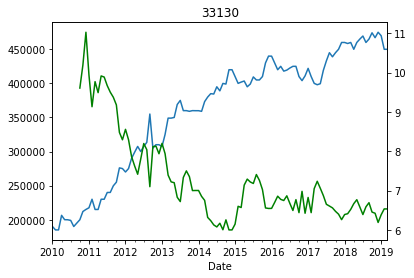

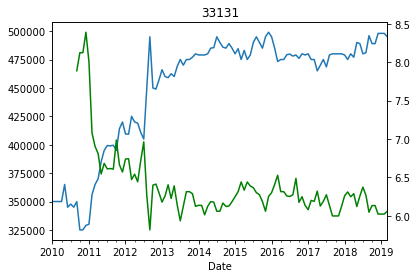

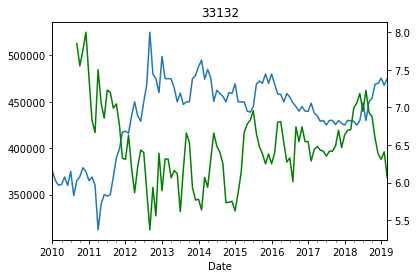

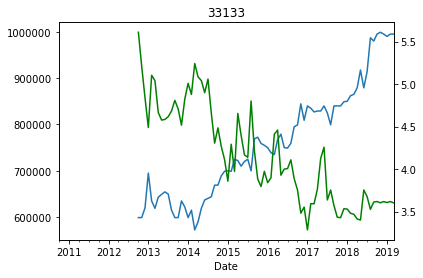

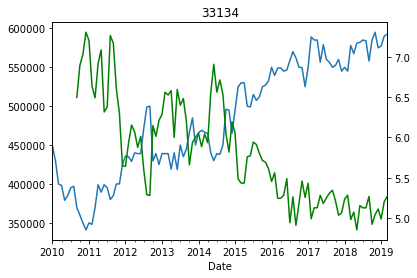

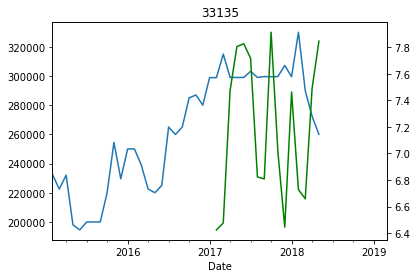

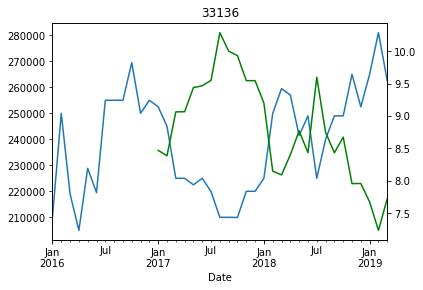

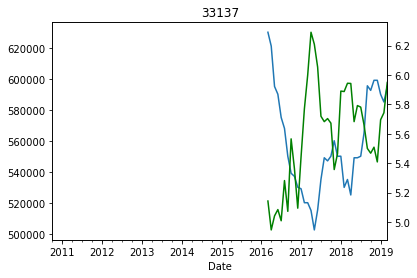

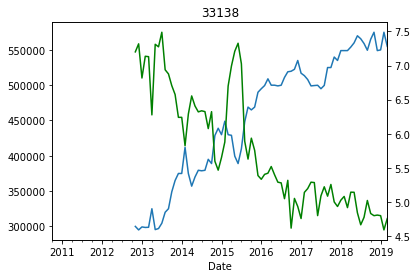

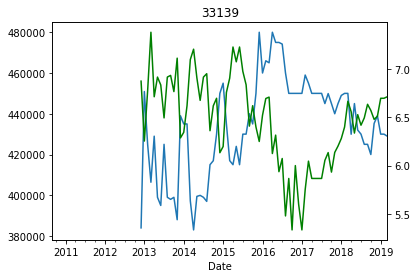

In [26]:
zips = np.arange(33130,33140).astype(str)

generateChart(zips)